In [361]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.io import loadmat

In [2]:
def get_lines(img):
    
    img_r = img[:,:,0] - img[:,:,0]
    img_g = img[:,:,1] - img[:,:,0]
    img_b = img[:,:,2] - img[:,:,0]
    
    return np.clip(np.dstack((img_r,img_g,img_b)),a_min = 0,a_max = 1)

def get_lines_BGR(img):
    
    img_b = img[:,:,0] - np.mean(img, axis = 2)
    img_g = 0*img[:,:,0] #img[:,:,1] - img[:,:,2]
    img_r = 0*img[:,:,0]#img[:,:,2] - img[:,:,2]
    
    return np.clip(np.dstack((img_r,img_g,img_b)),a_min = 0,a_max = 255).astype(np.uint8);


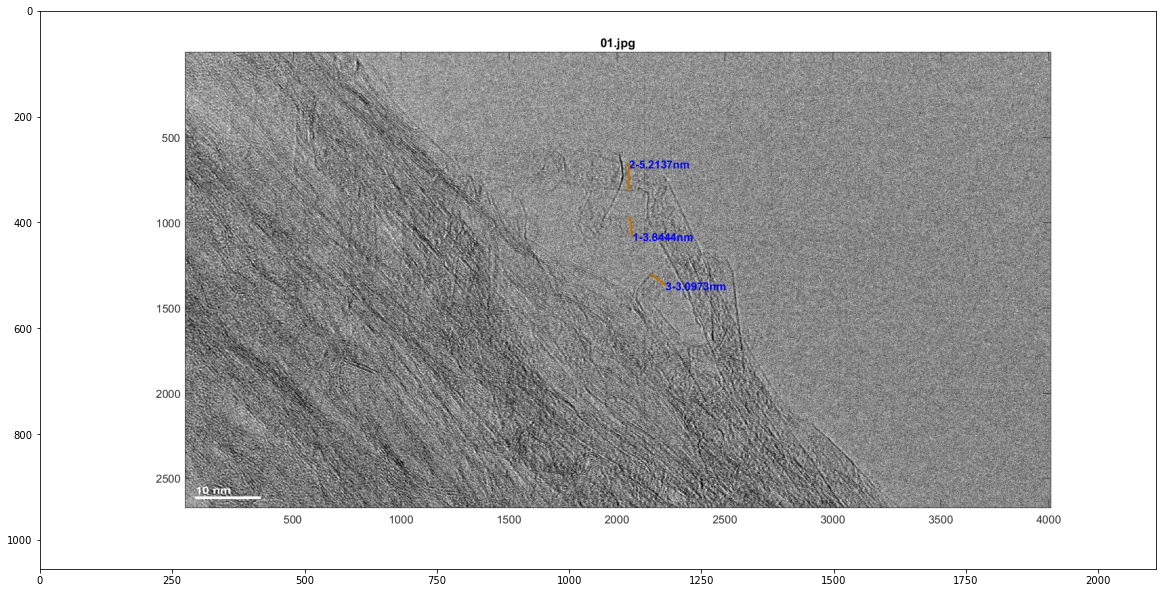

In [3]:
img = cv2.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/Measurments/meas1.tif')


plt.figure(figsize = (20,16))
plt.imshow(img)

In [4]:
img = img.astype(np.uint8)

In [5]:
#lines_bgr = get_lines_BGR(img);
#plt.figure(figsize = (20,16))
#plt.imshow(lines_bgr)

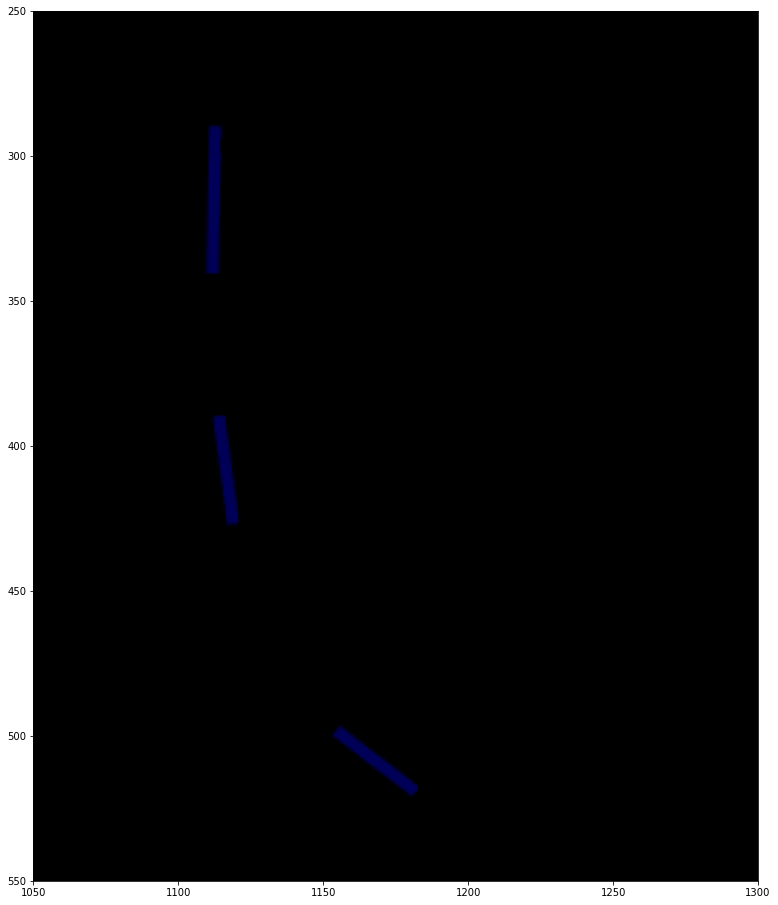

In [6]:
lines_bgr = get_lines_BGR(img);
plt.figure(figsize = (20,16))
plt.imshow(lines_bgr,vmax = (1))
plt.xlim(1050,1300)
plt.ylim(550,250)
plt.savefig('blue_lines.tif')

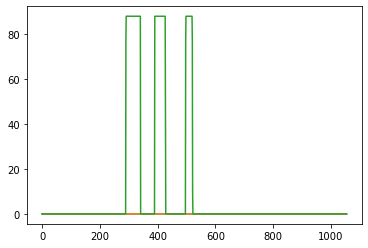

In [7]:
plt.plot(np.arange(lines_bgr.shape[0]),lines_bgr.max(axis = 1));

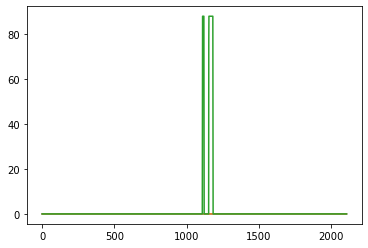

In [8]:
plt.plot(np.arange(lines_bgr.shape[1]),lines_bgr.max(axis = 0));

(1.0, 10.0)

<Figure size 1440x1152 with 0 Axes>

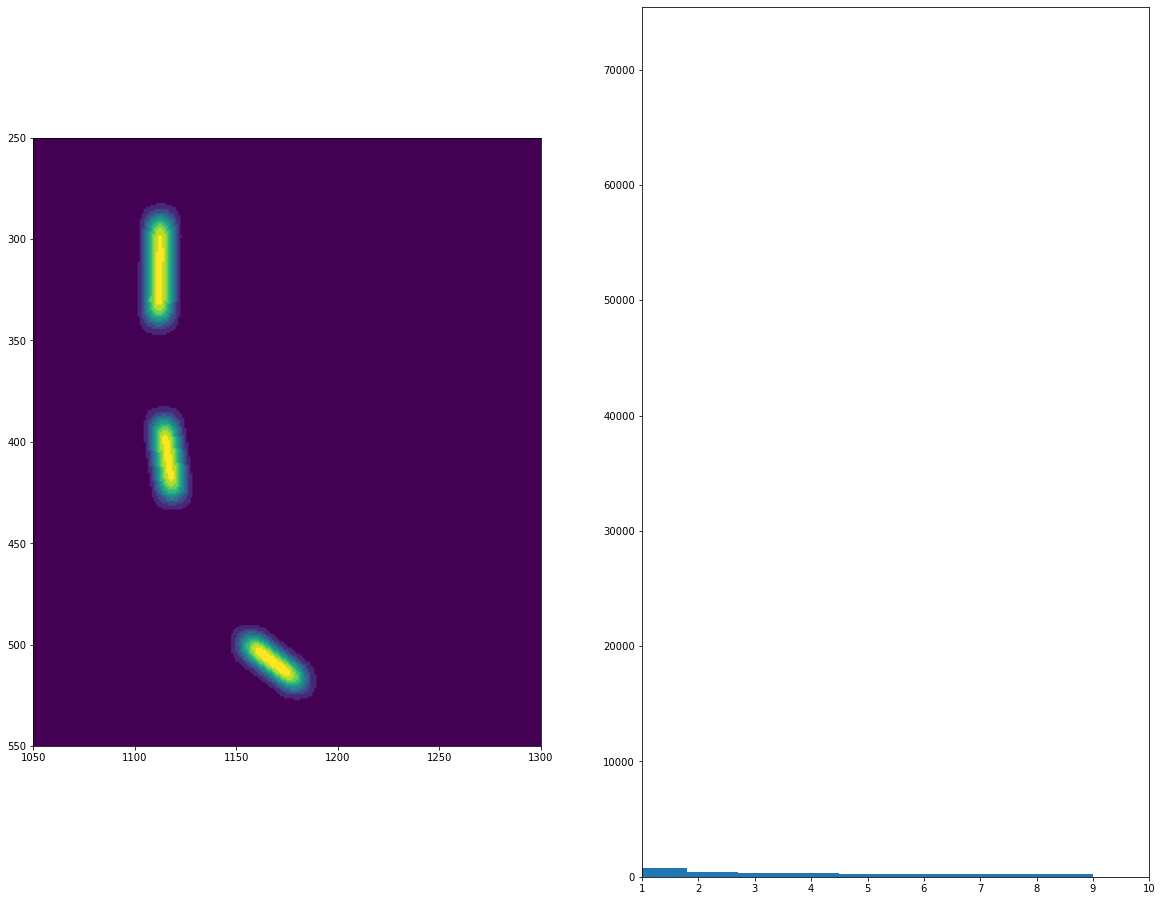

In [9]:
gray = cv2.cvtColor(lines_bgr,cv2.COLOR_BGR2GRAY)

kernel_size = 19
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),5)

plt.figure(figsize = (20,16))

f, ax = plt.subplots(1,2, figsize = (20,16))

ax[0].imshow(blur_gray)
ax[0].set_xlim(1050,1300)
ax[0].set_ylim(550,250)

ax[1].hist(blur_gray[250:550,1050:1300].ravel(), bins = 10)
ax[1].set_xlim([1,10])

(550.0, 250.0)

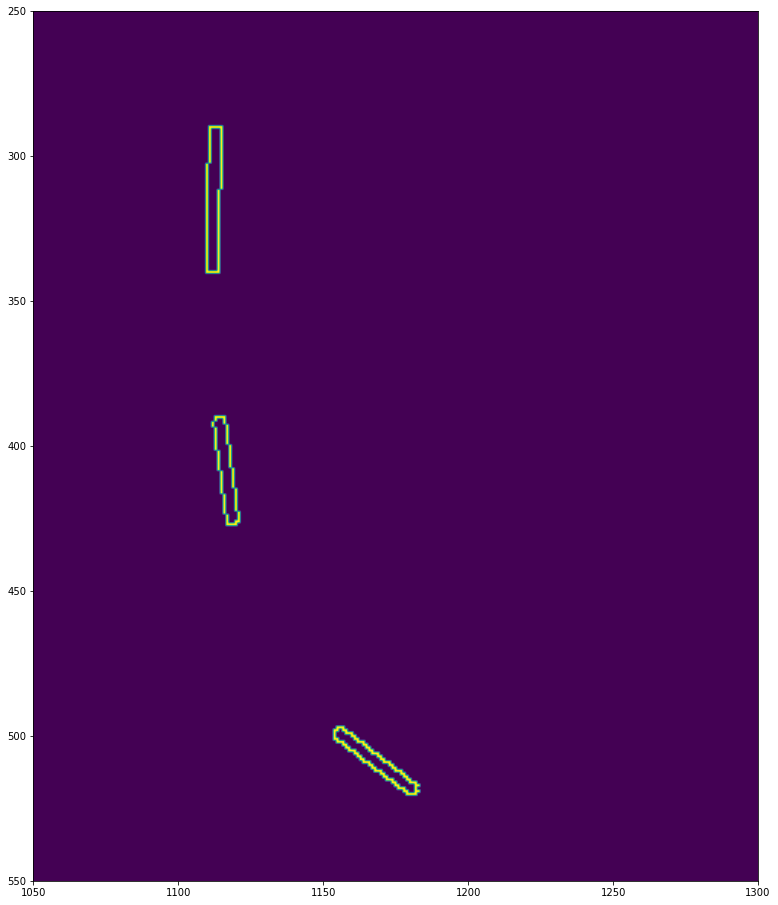

In [27]:
gray = cv2.cvtColor(lines_bgr,cv2.COLOR_BGR2GRAY)

kernel_size = 19
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),5)

edges = cv2.Canny(gray,20,80,apertureSize = 5)

plt.figure(figsize = (20,16))
plt.imshow(edges)
plt.xlim(1050,1300)
plt.ylim(550,250)

In [11]:
np.random.rand()

0.3680085956971225

(550.0, 250.0)

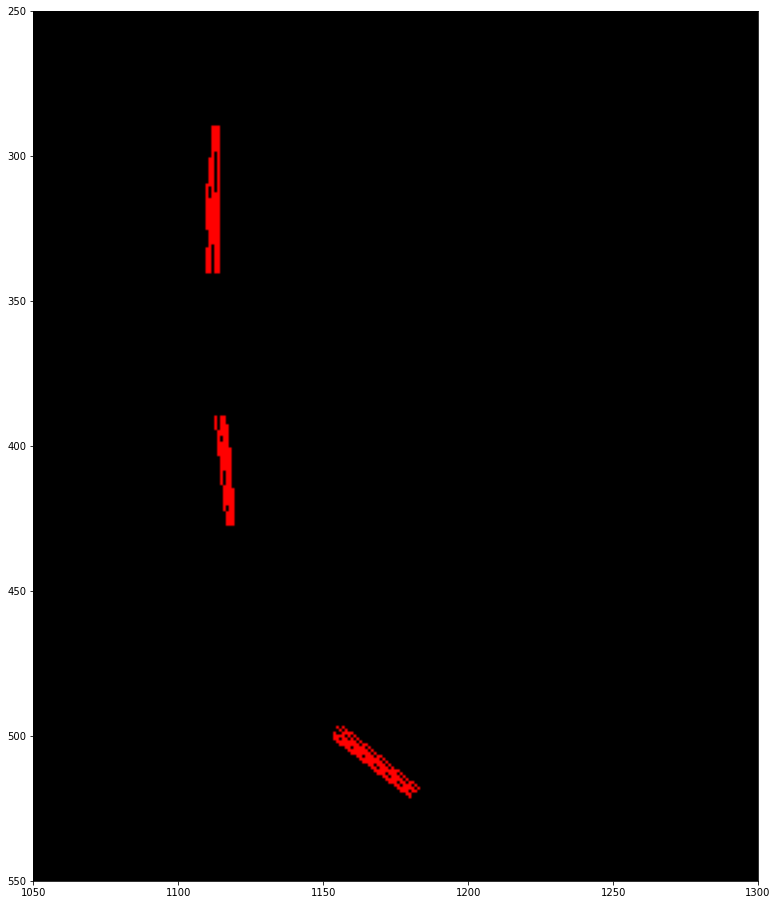

In [12]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = 0*img  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(gray, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
for line in lines: 
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)

plt.figure(figsize = (20,16))
        
        
plt.imshow(line_image)
plt.xlim(1050,1300)
plt.ylim(550,250)
#plt.savefig('l')

In [13]:
lines

array([[[1114,  340, 1114,  290]],

       [[1112,  290, 1113,  335]],

       [[1111,  301, 1113,  340]],

       [[1115,  390, 1118,  427]],

       [[1155,  497, 1182,  519]],

       [[1110,  310, 1111,  340]],

       [[1113,  390, 1117,  427]],

       [[1154,  499, 1181,  519]],

       [[1118,  401, 1119,  427]],

       [[1157,  497, 1183,  518]],

       [[1154,  500, 1180,  520]],

       [[1110,  340, 1113,  290]],

       [[1117,  393, 1117,  412]],

       [[1115,  407, 1116,  390]],

       [[1118,  426, 1118,  404]],

       [[1154,  501, 1180,  521]],

       [[1157,  500, 1179,  517]]], dtype=int32)

In [14]:
lines[0][0]

array([1114,  340, 1114,  290], dtype=int32)

In [15]:
def line_ends(lines):
    
    ends

def line_centers(lines):
    
    centers = []
    
    for line in lines:
        x1,y1,x2,y2 = line[0]
        centers.append(((x1+x2)/2 ,(y1+y2)/2)) # centerpoint of line
        
    return centers

(550.0, 250.0)

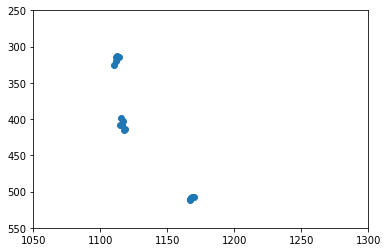

In [16]:
centers = line_centers(lines)
plt.scatter(*zip(*centers)) # https://stackoverflow.com/questions/18458734/how-do-i-plot-list-of-tuples-in-python
plt.xlim(1050,1300)
plt.ylim(550,250)

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\scipy\cluster\vq.py:579: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


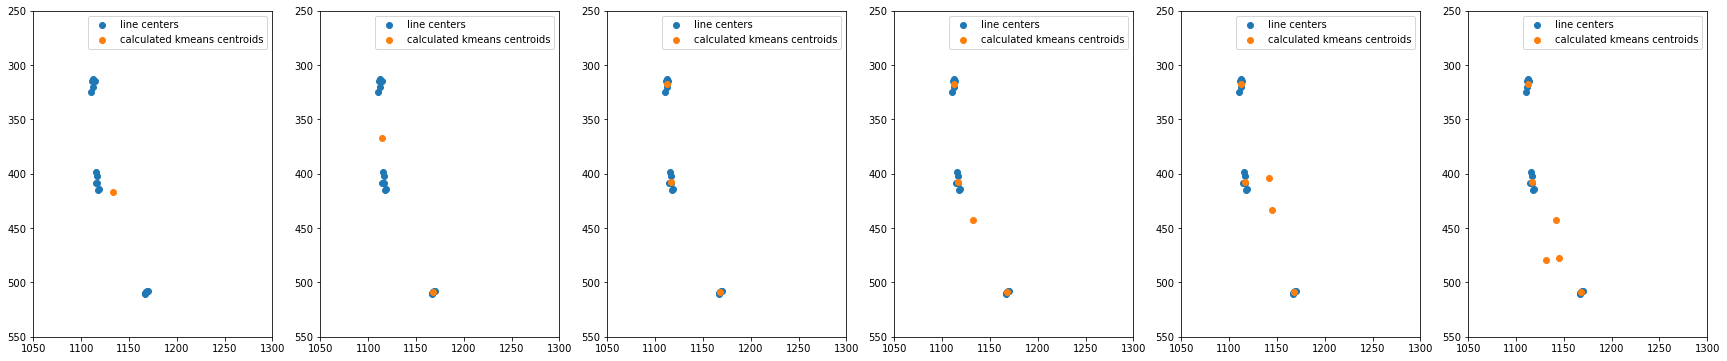

In [17]:
from scipy.cluster.vq import kmeans2


k_vals = np.arange(1,7)


f,ax = plt.subplots(1,len(k_vals),figsize = (30,6))


for i,k in enumerate(k_vals):
    
                    
    clust = kmeans2(centers,k = k)
    
    ax[i].scatter(*zip(*centers),label = 'line centers')
    ax[i].scatter(*zip(*clust[0]),label = 'calculated kmeans centroids')
    ax[i].set_xlim(1050,1300)
    ax[i].set_ylim(550,250)
    ax[i].legend(loc="upper right")

In [18]:
line_list = [line[0].astype(float) for line in lines]
line_list

[array([1114.,  340., 1114.,  290.]),
 array([1112.,  290., 1113.,  335.]),
 array([1111.,  301., 1113.,  340.]),
 array([1115.,  390., 1118.,  427.]),
 array([1155.,  497., 1182.,  519.]),
 array([1110.,  310., 1111.,  340.]),
 array([1113.,  390., 1117.,  427.]),
 array([1154.,  499., 1181.,  519.]),
 array([1118.,  401., 1119.,  427.]),
 array([1157.,  497., 1183.,  518.]),
 array([1154.,  500., 1180.,  520.]),
 array([1110.,  340., 1113.,  290.]),
 array([1117.,  393., 1117.,  412.]),
 array([1115.,  407., 1116.,  390.]),
 array([1118.,  426., 1118.,  404.]),
 array([1154.,  501., 1180.,  521.]),
 array([1157.,  500., 1179.,  517.])]

In [19]:
line_clusts = kmeans2(line_list,k = 3)
line_clusts[0]

array([[1113.90909091,  362.54545455, 1115.36363636,  371.09090909],
       [1141.26785262,  458.60336313, 1156.84353083,  522.02441123],
       [1155.16666667,  499.        , 1180.83333333,  519.        ]])

In [20]:
sklearn_clusters = KMeans(line_list)
sklearn_clusters

KMeans(n_clusters=[array([1114.,  340., 1114.,  290.]),
                   array([1112.,  290., 1113.,  335.]),
                   array([1111.,  301., 1113.,  340.]),
                   array([1115.,  390., 1118.,  427.]),
                   array([1155.,  497., 1182.,  519.]),
                   array([1110.,  310., 1111.,  340.]),
                   array([1113.,  390., 1117.,  427.]),
                   array([1154.,  499., 1181.,  519.]),
                   array([1118.,  401., 1119.,  427.]),
                   array([1157.,  497., 1183.,  518.]),
                   array([1154.,  500., 1180.,  520.]),
                   array([1110.,  340., 1113.,  290.]),
                   array([1117.,  393., 1117.,  412.]),
                   array([1115.,  407., 1116.,  390.]),
                   array([1118.,  426., 1118.,  404.]),
                   array([1154.,  501., 1180.,  521.]),
                   array([1157.,  500., 1179.,  517.])])

In [21]:
def plot_clusters(clusters):
    
    for cluster in clusters:
        x1,y1,x2,y2 = cluster
    

In [26]:
line_clusts[1]

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2])

(550.0, 250.0)

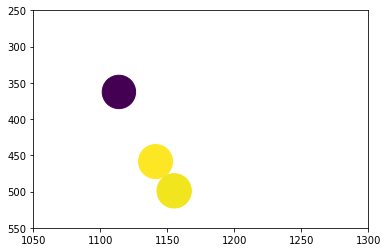

In [23]:
plt.scatter(*zip(*line_clusts[0]))
plt.xlim(1050,1300)
plt.ylim(550,250)

In [29]:
plotFig("./meas22.fig")

TypeError: 'mat_struct' object is not iterable

In [31]:
meas22 = loadmat("./meas22.fig")

In [34]:
meas22.keys()

dict_keys(['__header__', '__version__', '__globals__', 'hgS_070000', 'hgM_070000', '__function_workspace__'])

In [173]:
mat_cmap_img = meas22["hgS_070000"][0][0][2][0][0][10]

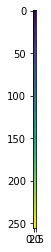

In [174]:
plt.imshow(mat_cmap_img)

In [185]:
mat_img = meas22["hgS_070000"][0][0][3][0][0][3][0][0][2][0][0][1]

In [ ]:
mat_img.gray

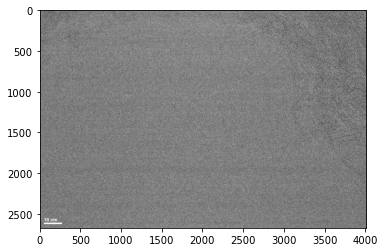

In [186]:
plt.imshow(mat_img)

In [163]:
meas22["hgS_070000"][0][0][3][0][0][3][0][0]

(array(['image'], dtype='<U5'), array([[14.00354004]]), array([[(array(['auto'], dtype='<U4'), array([[[144, 144, 144],
        [104, 104, 104],
        [120, 120, 120],
        ...,
        [188, 188, 188],
        [166, 166, 166],
        [177, 177, 177]],

       [[147, 147, 147],
        [158, 158, 158],
        [150, 150, 150],
        ...,
        [178, 178, 178],
        [151, 151, 151],
        [162, 162, 162]],

       [[115, 115, 115],
        [142, 142, 142],
        [116, 116, 116],
        ...,
        [152, 152, 152],
        [139, 139, 139],
        [145, 145, 145]],

       ...,

       [[119, 119, 119],
        [145, 145, 145],
        [ 80,  80,  80],
        ...,
        [ 81,  81,  81],
        [ 62,  62,  62],
        [ 65,  65,  65]],

       [[133, 133, 133],
        [113, 113, 113],
        [ 22,  22,  22],
        ...,
        [ 54,  54,  54],
        [181, 181, 181],
        [100, 100, 100]],

       [[134, 134, 134],
        [131, 131, 131],
        [140, 140

In [210]:
matlab_lines_data = meas22["hgS_070000"][0][0][3][0][0][3][2::2] # stepping by 2 skips over the text

In [211]:
matlab_lines_data[0]

array([(array(['line'], dtype='<U4'), array([[17.00354004]]), array([[(array([[0.   , 0.447, 0.741]]), array(['auto'], dtype='<U4'), array([[2620.65223195, 2642.65423167]]), array([[266.00901547, 314.8419558 ]]), array([[2]], dtype=uint8), array([], dtype='<U1'), array([[array(['X'], dtype='<U1'), array(['Y'], dtype='<U1'),
        array(['Z'], dtype='<U1')]], dtype=object), array(['auto'], dtype='<U4'), array([[(array([[(array([[(array(['on'], dtype='<U2'),)]], dtype=[('IconDisplayStyle', 'O')]),)]],
      dtype=[('LegendInformation', 'O')]),)]],
      dtype=[('SerializedAnnotationV7', 'O')]))]],
      dtype=[('Color', 'O'), ('ColorMode', 'O'), ('XData', 'O'), ('YData', 'O'), ('LineWidth', 'O'), ('ButtonDownFcn', 'O'), ('DimensionNames', 'O'), ('DimensionNamesMode', 'O'), ('ApplicationData', 'O')]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64))],
      dtype=[('type', 'O'), ('handle', 'O'), ('properties', 'O'), ('children', 'O'), ('special', 'O')])

In [121]:
x1,x2 = matlab_lines_data[0][0][2][0][0][2][0] # 2 indicates x values, replace same index with a 3 to get y values for line

In [201]:
matlab_lines_data[0][0][2][0][0][2][0]

array([2620.65223195, 2642.65423167])

In [120]:
y1, y2 = matlab_lines_data[0][0][2][0][0][3][0]

In [81]:
meas22["hgS_070000"][0][0][3][0][0][3][1]

array([(array(['text'], dtype='<U4'), array([[16.00354004]]), array([[(array([[1, 0, 0]], dtype=uint8), array([[2620.65223195,  266.00901547,    0.        ]]), array([[array(['1-2.4291nm'], dtype='<U10')]], dtype=object), array(['bold'], dtype='<U4'), array([], dtype='<U1'), array([[array(['X'], dtype='<U1'), array(['Y'], dtype='<U1'),
        array(['Z'], dtype='<U1')]], dtype=object), array(['auto'], dtype='<U4'))]],
      dtype=[('Color', 'O'), ('Position', 'O'), ('String', 'O'), ('FontWeight', 'O'), ('ButtonDownFcn', 'O'), ('DimensionNames', 'O'), ('DimensionNamesMode', 'O')]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64))],
      dtype=[('type', 'O'), ('handle', 'O'), ('properties', 'O'), ('children', 'O'), ('special', 'O')])

In [375]:
class cnt_mat_fig:
    
    def __init__(self, mat_fig):
        
        '''
        Instantiates a cnt_mat_fig from a .fig matlab output file.
        
        '''
        
        line_data = mat_fig["hgS_070000"][0][0][3][0][0][3][2::2]
        
        line_list = []
        center_list = []
        diameters_list = []
        
        for line in line_data:
            
            x1,x2 = [int(i) for i in line[0][2][0][0][2][0]]
            y1,y2 = [int(i) for i in line[0][2][0][0][3][0]]
        
            line_list.append([x1,y1,x2,y2])
            center_list.append([int((x1+x2)/2), int((y1+y2)/2)])
            diameters_list.append(np.sqrt((x2-x1)**2 + (y2-y1)**2))
        
        self.lines_ = line_list
        self.centers_ = center_list
        self.diameters_ = diameters_list
        #img = mat_fig["hgS_070000"][0][0][3][0][0][3][0][0][2][0][0][1][:,:,0]
        #self.img_ = np.reshape(img, [*img.shape,1]) # add extra dimension to make keras happy
        self.img_ = mat_fig["hgS_070000"][0][0][3][0][0][3][0][0][2][0][0][1][:,:,0]
        
    def get_ROIs(self,length = 32):
        '''
        Copys length x length square images bought each measurement center. 
        Default length is 32.
        '''
        
        ROI_list = [] # list of length x length images
        
        for center in self.centers_:
            
            l = int(length/2)
            x = center[0]
            y = center[1]
            ROI_list.append(self.img_[y - l : y + l, x - l : x + l])
            
        
        return ROI_list
    
    def get_negs(self,length = 32,n = 5):
        '''
        Returns n length x length images with no suitable CNTs (negative images) from the original image. 
        Will not return any images that are within length/2 of any measurement point.
        length should be set to the same length in get_ROIs.
        '''
        
        neg_list = []
        
        l = int(length/2)
        
        def overlap(p1,p2,l):
            x1,y1 = p1
            x2,y2 = p2
            
            if np.abs(x1-x2) < l:
                return 1
            if np.abs(y1-y2) < l:
                return 1
            else:
                return 0
        
        y_px,x_px = self.img_.shape
        
        for i in range(n):
                       
            overlapped = True
            
            while overlapped:
            
                overlapped = False
            
                # choose random x and y for the negative image that are at least l (length/2) away from an edge
                x = int(np.random.rand()*(x_px-2*l)+l)
                y = int(np.random.rand()*(y_px-2*l)+l)

                for center in self.centers_:
                    if overlap([x,y],center,l): 
                        overlapped = True # if any center points are too close to (x,y), try again
                        break
            
            neg_list.append(self.img_[y - l : y + l, x - l : x + l])
        
        return neg_list

In [377]:
m22 = cnt_mat_fig(meas22)

In [326]:
m22.centers_

[[2631, 290], [3116, 861], [3248, 1560], [3003, 518]]

In [313]:
m22.img_.shape

(2672, 4008)

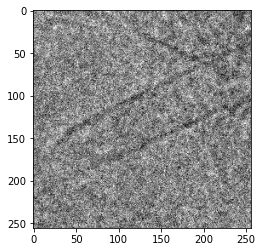

In [323]:
x,y = m22.centers_[0]
l = 128
img22_crop = m22.img_[y - l : y + l, x - l : x + l] 


plt.imshow(img22_crop,cmap = 'gray')

In [308]:
x + l

3180

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  """Entry point for launching an IPython kernel.


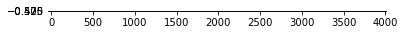

In [309]:
plt.imshow(m22.img_[3052:3180,:,0],cmap = 'gray')

In [295]:
m22.img_.shape

(2672, 4008, 1)

In [287]:
for center in m22.centers_:
    print(center)

[2631, 290]
[3116, 861]
[3248, 1560]
[3003, 518]


In [265]:
img22.shape

(2672, 4008, 1)

In [341]:
ROIs = m22.get_ROIs(length = 256)

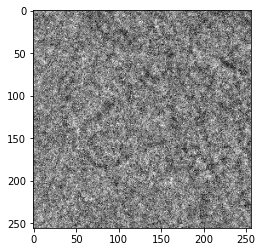

In [332]:
plt.imshow(ROIs[3][:,:],cmap = 'gray')

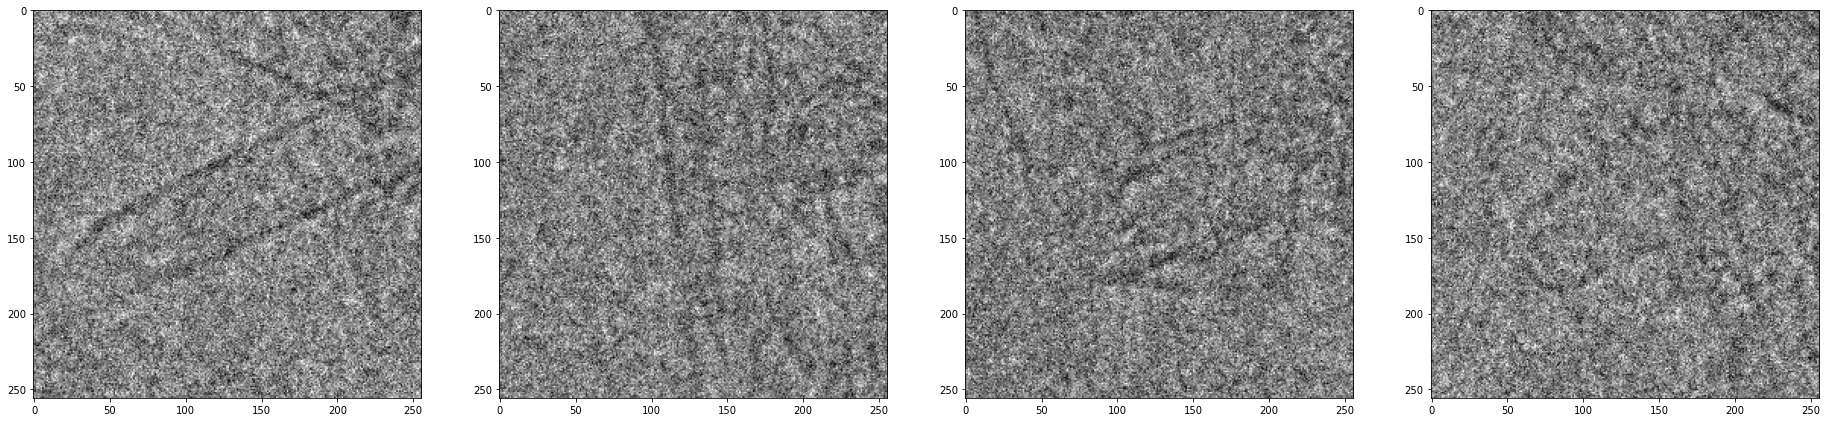

In [354]:
f,ax = plt.subplots(1,len(ROIs),figsize = (32,8))

for i,axis in enumerate(ax):
    axis.imshow(ROIs[i],cmap = 'gray')

In [ ]:
negs22 = m22.get_negs()

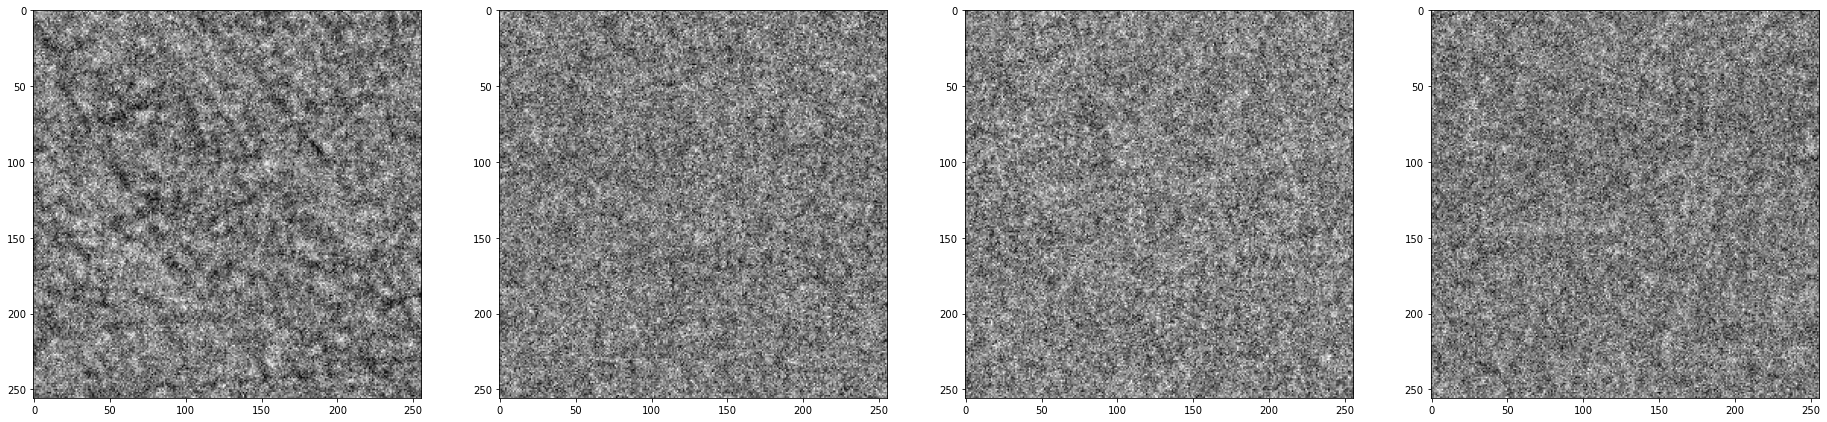

In [380]:
negs22 = m22.get_negs(length = 256, n = 4)

f,ax = plt.subplots(1,len(negs22),figsize = (32,8))

for i,axis in enumerate(ax):
    axis.imshow(negs22[i],cmap = 'gray')

In [397]:
def flip_rot(imgs,flip = True, rotate = True):
    
    imgs_out = []#np.zeros(len(imgs)*(flip+1)*(rotate*3 +1))
    
    for img in imgs:
        
        for rot in range(4):
            
            imgs_out.append(img)
            
            if flip:
                imgs_out.append(np.flip(img))
            
            img = img.T
            
            if rot == 0 and rotate == False:
                break
    return imgs_out

In [398]:
ROIs_aug = flip_rot(ROIs)

In [393]:
len(ROIs_aug)

32

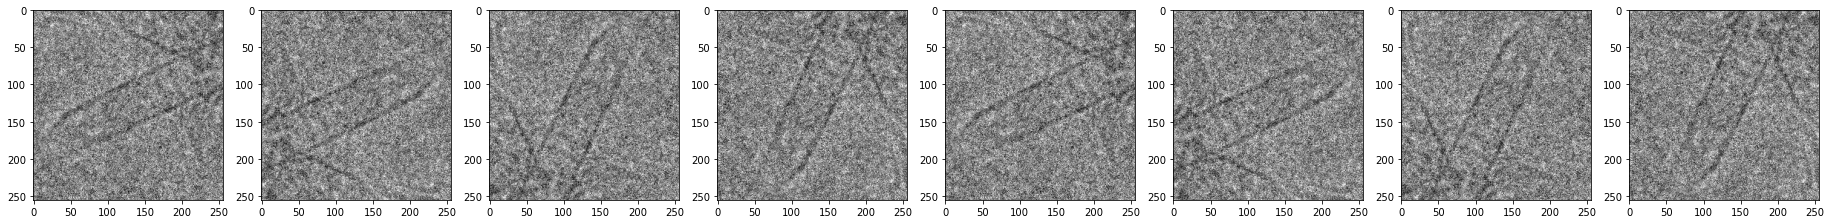

In [400]:
f,ax = plt.subplots(1,8,figsize = (32,8))

#print(ax.shape)

for i,axis in enumerate(ax):
    axis.imshow(ROIs_aug[i],cmap = 'gray')